In [6]:
import s3fs
import pandas as pd
import matplotlib.pyplot as plt
# Initialize the S3 filesystem
s3 = s3fs.S3FileSystem()

# Define the S3 path as a string
s3_path = 's3://aws-emr-studio-992382776059-us-east-2/1717965722053/e-9BBQW3CFDNRYZC7JG8NQ3YHG9/filtered_data.csv'

# Open the S3 file and read it into a pandas DataFrame
with s3.open(s3_path, 'rb') as f:
    df = pd.read_csv(f)

# Display the DataFrame
print(df)

     token  year  frequency  pages  books
0    token  year  frequency  pages  books
1     data  1584         16     14      1
2     data  1614          3      2      1
3     data  1627          1      1      1
4     data  1631         22     18      1
..     ...   ...        ...    ...    ...
312   data  2004     201841  93539   3483
313   data  2005     197467  88901   3392
314   data  2006     203669  92960   3449
315   data  2007     168338  78986   3246
316   data  2008     105331  47811   2358

[317 rows x 5 columns]


In [10]:
# Get descriptive statistics
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
       token  year frequency pages books
count    317   317       317   317   317
unique     2   317       255   250   234
top     data  year         1     1     1
freq     316     1        25    25    33


In [12]:
# Get the shape of the DataFrame
print("\nShape of DataFrame:")
print(df.shape)


Shape of DataFrame:
(317, 5)


In [14]:
# Get information about the DataFrame
print("\nDataFrame Info:")
print(df.info())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   token      317 non-null    object
 1   year       317 non-null    object
 2   frequency  317 non-null    object
 3   pages      317 non-null    object
 4   books      317 non-null    object
dtypes: object(5)
memory usage: 12.5+ KB
None


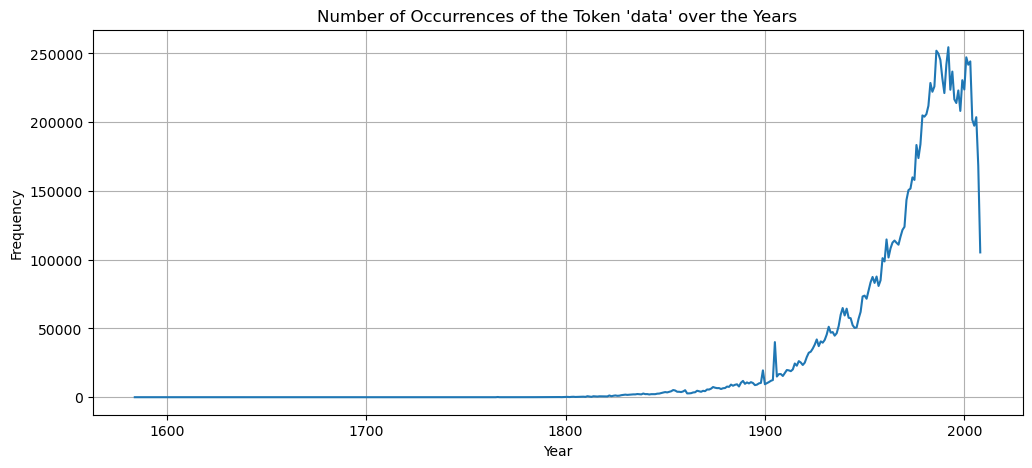

In [32]:
import matplotlib.pyplot as plt

# Filter and convert data
df = df[df['year'].apply(lambda x: str(x).isdigit())]
df['year'] = df['year'].astype('int32')
df['frequency'] = df['frequency'].astype('int32')

# Plot the data
plt.figure(figsize=(12, 5))
plt.plot(df['year'], df['frequency'])
plt.title("Number of Occurrences of the Token 'data' over the Years")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()